In [2]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from mf import MatrixFactorization
import scipy.sparse
%matplotlib inline

In [3]:
def recall_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[::-1][:k]
    return actual[ind].sum() / actual.sum()

def precision_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[::-1][:k]
    return actual[ind].sum() / k

def ndcg_at_k(k: int, scores: np.ndarray, actual: np.ndarray):
    ind = np.argsort(scores)[:k:-1]
    rel = actual[ind]
    dcg = 0
    for i in range(len(rel)):
        dcg += rel[i] / np.log2(i + 1 + 1)
    rec_set = np.sort(rel)[::-1]
    idcg = 0
    for i in range(len(rec_set)):
        idcg += rec_set[i] / np.log2(i + 1 + 1)
    return dcg / idcg


In [4]:
x = scipy.sparse.load_npz('./data/train.npz')
y = scipy.sparse.load_npz('./data/test.npz')

In [5]:
M = MatrixFactorization(K=100, iterations=200) # after 200-250 iterations, test error increases

  0%|          | 0/200 [00:00<?, ?it/s]

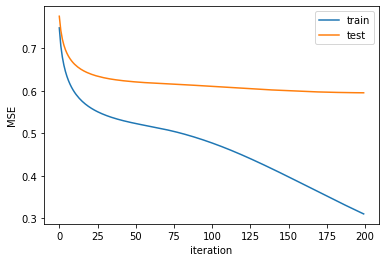

In [5]:
e_train, e_test = M.train(x, y)
plt.plot(e_train, label="train")
plt.plot(e_test, label="test")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.legend()
plt.show()
M.save("checkpoint.model")

In [6]:
M.load("checkpoint.model")

In [7]:
_y = y.tocsr()

In [24]:
recall_scores = []
for i in tqdm(range(1000)):
    topk = M.recommend_sim(k=10, user=i)
    actual = _y[i]
    recall_scores.append(actual[:,topk].count_nonzero() / actual.count_nonzero())

100%|████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:40<00:00, 24.90it/s]


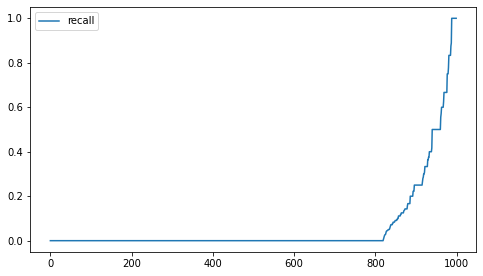

In [14]:
plt.figure(figsize=(8, 4.5))
plt.plot(sorted(recall_scores), label="recall")
plt.legend()
plt.show()

In [15]:
np.mean(recall_scores)

0.06326255485614572

In [11]:
recall_scores = []
ndcg_scores = []

for i in tqdm(range(y.shape[0])):
    topk = M.recommend(k=10, user=i)
    actual = _y[i]
    recall_scores.append(actual[:,topk].sum() / actual.sum())
    # ndcg_scores.append(ndcg_at_k(k=10, scores=scores, actual=y[i]))

100%|███████████████████████████████████████████████████████████████████████████| 68401/68401 [14:13<00:00, 80.13it/s]


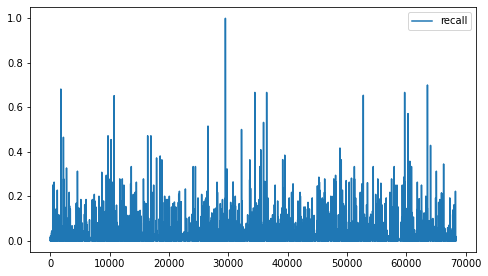

In [12]:
plt.figure(figsize=(8, 4.5))
plt.plot(recall_scores, label="recall")
plt.legend()
plt.show()

In [13]:
np.mean(recall_scores)

0.001757089436143059

In [14]:
precision_scores = []

for i in tqdm(range(y.shape[0])):
    topk = M.recommend(k=10, user=i)
    actual = _y[i]
    precision_scores.append(actual[:,topk].sum() / 10)

100%|███████████████████████████████████████████████████████████████████████████| 68401/68401 [14:19<00:00, 79.60it/s]


In [15]:
np.mean(precision_scores)

0.01589011856551805

In [16]:
len(M.Q)

88276

In [17]:
M.Q.shape

(88276, 100)